In [81]:
import pandas as pd

In [82]:
import numpy as np

In [83]:
import math

In [84]:
train=pd.read_csv('f:/ym4trainsparse.csv',usecols=[1,2,3])
test=pd.read_csv('f:/ym4testsparse.csv',usecols=[1,2,3])

In [85]:
no_movies = 1001
no_users = 15401

In [86]:
train.head()

,userId,movieId,rating
0,3511,292,5
1,4618,127,5
2,2521,312,4
3,14132,651,1
4,10181,643,1


In [87]:
movies_mean=np.zeros(shape=[no_movies,3])

In [88]:
user_total=np.zeros(no_users)
cnt=np.zeros(no_users,dtype='int64')
for i, row in enumerate(train.itertuples(), 1):
    p=int(row.movieId)
    movies_mean[p][0]+=1
    movies_mean[p][1]+=row.rating
    k=int(row.userId)
    cnt[k]+=1
    user_total[k]+=row.rating
 

In [89]:
user_mean=np.array([ i/j for i,j in zip(user_total,cnt) ])
for x in movies_mean:
    x[2]=round(x[1]/x[0],2)
    
for x in movies_mean:
    if math.isnan(x[2]):
        x[2]=0
        


In [90]:
for i in range(len(user_mean)):
    if math.isnan(user_mean[i]):
        user_mean[i]=0

In [91]:
foruser=np.zeros(no_users)
formovies=np.zeros(no_movies)
for i, row in enumerate(train.itertuples(), 1):
    mov=int(row.movieId)
    usr=int(row.userId)
    foruser[usr]+=movies_mean[mov][2]
    formovies[mov]+=user_mean[usr]

In [92]:
import time

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
rmse=[]
mae=[]
gim=[]
gpim=[]
precission=[]
recall=[]
Beta=[i/10 for i in range(1,11)]
for beta in Beta:
    error=0
    err1=0
    g2=0
    gp2=0
    tp=0
    fp=0
    tn=0
    fn=0
    c_gim=0
    c_gpim=0
    c=0
    for i, row in enumerate(test.itertuples(), 1):
        
        mov=int(row.movieId)
        usr=int(row.userId)
        actual=row.rating
        predicted_rating=0
    
    
        usr_mean=user_mean[usr]
    
        item_mean=movies_mean[mov][2]
        usr_rated=cnt[usr]
        usr_tendency=0
        if usr_rated!=0:
            usr_tendency=(user_total[usr]-foruser[usr])/usr_rated
   
        no_of_ratings=movies_mean[mov][0]
        item_tendency=0
        if no_of_ratings!=0:
            item_tendency=(movies_mean[mov][1]-formovies[mov])/no_of_ratings
   
        if usr_tendency>=0 and item_tendency>=0:
            predicted_rating=max(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency<0:
            predicted_rating=min(usr_mean+item_tendency,item_mean+usr_tendency)
    
        elif usr_tendency<0 and item_tendency>=0 and item_mean>usr_mean:
            predicted_rating=min(max(usr_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),item_mean)
        
        elif usr_tendency>=0 and item_tendency<0 and item_mean<usr_mean:
            predicted_rating=min(max(item_mean, (item_mean+usr_tendency)*beta + (usr_mean+item_tendency)*(1-beta)),usr_mean)
        else:
            predicted_rating=((item_mean*beta) +usr_mean*(1-beta))
    
        error+=((actual-predicted_rating)**2)
        err1+=math.fabs(actual-predicted_rating)
        c+=1
        if actual >=3:
            g2+=abs(actual-predicted_rating)
            c_gim+=1
        if predicted_rating >=3:
            gp2+=abs(actual-predicted_rating)
            c_gpim+=1
    
        if actual>=3 and predicted_rating>=3:
            tp+=1
        elif actual<3 and predicted_rating>=3:
            fp+=1
        elif actual>=3 and predicted_rating<3:
            fn+=1
        else:
            tn+=1
    
    gim.append(g2/c_gim)
    gpim.append(gp2/c_gpim)
    precission.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))
    rmse.append(math.sqrt(error/c))
    mae.append(err1/c)

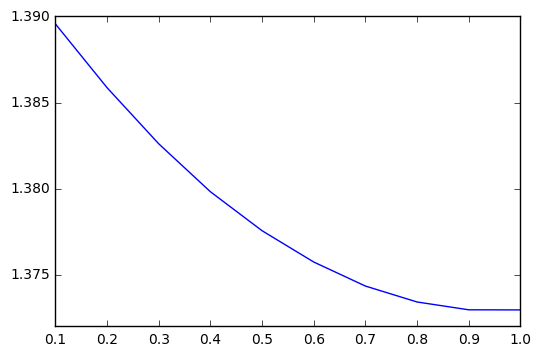

In [95]:
plt.plot(Beta,rmse)

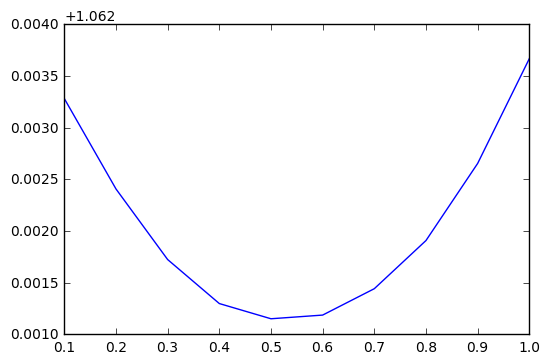

In [96]:
plt.plot(Beta,mae)

In [97]:
mae

[1.0652829487687567,
 1.0644080803623575,
 1.0637248177358782,
 1.063298992421484,
 1.0631517660073324,
 1.0631873905328544,
 1.0634427484310809,
 1.0639087688509388,
 1.0646546728573942,
 1.065668700749794]

In [98]:
rmse

[1.3895645233995377,
 1.3858609599285001,
 1.3826031223195452,
 1.3798211400697031,
 1.3775572452457834,
 1.3757398290560303,
 1.3743446578190326,
 1.3734198610128479,
 1.37296610383076,
 1.3729595763640499]

In [99]:
gim

[1.0274340155777519,
 1.0254440654821038,
 1.0235278514251174,
 1.0219229496879068,
 1.0205533276833578,
 1.0193711043305624,
 1.0184925459869645,
 1.0178399814309504,
 1.0173606881049904,
 1.0171697890678058]

In [100]:
gpim

[1.0617128523953869,
 1.0609699630788452,
 1.0605519037314466,
 1.0613671264363387,
 1.0600901583906146,
 1.0616127816672503,
 1.0621441945133741,
 1.0629557153702189,
 1.0648155288771335,
 1.0649729401805672]

In [101]:
precission

[0.7877918101798699,
 0.788023722976851,
 0.7883365200764818,
 0.7888103876265037,
 0.7880061115355232,
 0.7875548768849017,
 0.7883920076117983,
 0.7879075056861259,
 0.7868665780983108,
 0.7858765619083681]

In [102]:
recall

[0.678030303030303,
 0.6783596837944664,
 0.6790184453227931,
 0.6803359683794467,
 0.6795125164690382,
 0.6795125164690382,
 0.6823122529644269,
 0.6846179183135704,
 0.682806324110672,
 0.6836297760210803]